### Credit Risk Modeling 

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Overview</strong>

*Credit Risk Definition: The likelihood that a borrower will not repay their loan.*

Expected Loss ( amount the firm loss as a result of loan default )
= PD * EAD * LGD

- Probability of Default (PD) (likelyhood of a client defaulting on a loan)

- Exposure at Default (EAD) (The amount outstanding at the time of default)

- Losss Given Default (LGD) (The ratio of the exposure against any recovery from loss)

This Analysis will focus on propability of default (PD)
    
</div>

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Data Description</strong>

Data Types
- Application Data (Interest Rate, Grade, Amount)
- Behavioural Data (Employment Length, Historical Default, Income)

For the purpose of demonstration, the data I have used is emulating real credit application data.
Open source datasets have been imported from DataCamp. 

Features:
- Income 
- Age 
- Home ownership
- Employment length 
- Loan intent
- Percent Income 
- Loan grade
- Loan amount
- Interest rate 
- Laon status
- Historical default 
- Credit history length
    
</div>

### Data Cleaning

In [67]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 10.6 MB/s eta 0:00:12
   ---------------------------------------- 1.1/124.9 MB 13.6 MB/s eta 0:00:10
    --------------------------------------- 1.6/124.9 MB 14.4 MB/s eta 0:00:09
    --------------------------------------- 1.9/124.9 MB 15.2 MB/s eta 0:00:09
    --------------------------------------- 2.3/124.9 MB 11.0 MB/s eta 0:00:12
    --------------------------------------- 3.1/124.9 MB 12.2 MB/s eta 0:00:11
   - -------------------------------------- 4.0/124.9 MB 13.4 MB/s eta 0:00:10
   - -------------------------------------- 4.7/124.9 MB 13.6 MB/s eta 0:00:09
   - -------------------------------------- 5.7/124.9 MB 14.4 MB/s eta 0:00:09
   -- -------

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

#### Describe

In [2]:
df = pd.read_csv('credit_data.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [4]:
print(df.shape)

(32581, 12)


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Missing Data

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.apply(lambda x: (x == 0).sum())

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length              4105
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                   25473
loan_percent_income               9
cb_person_default_on_file         0
cb_person_cred_hist_length        0
dtype: int64

In [8]:
# Print the top five rows with nulls for employment length
df[df['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [9]:
# Print the top five rows with nulls for employment length
df[df['loan_int_rate'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4


#### Value Counts

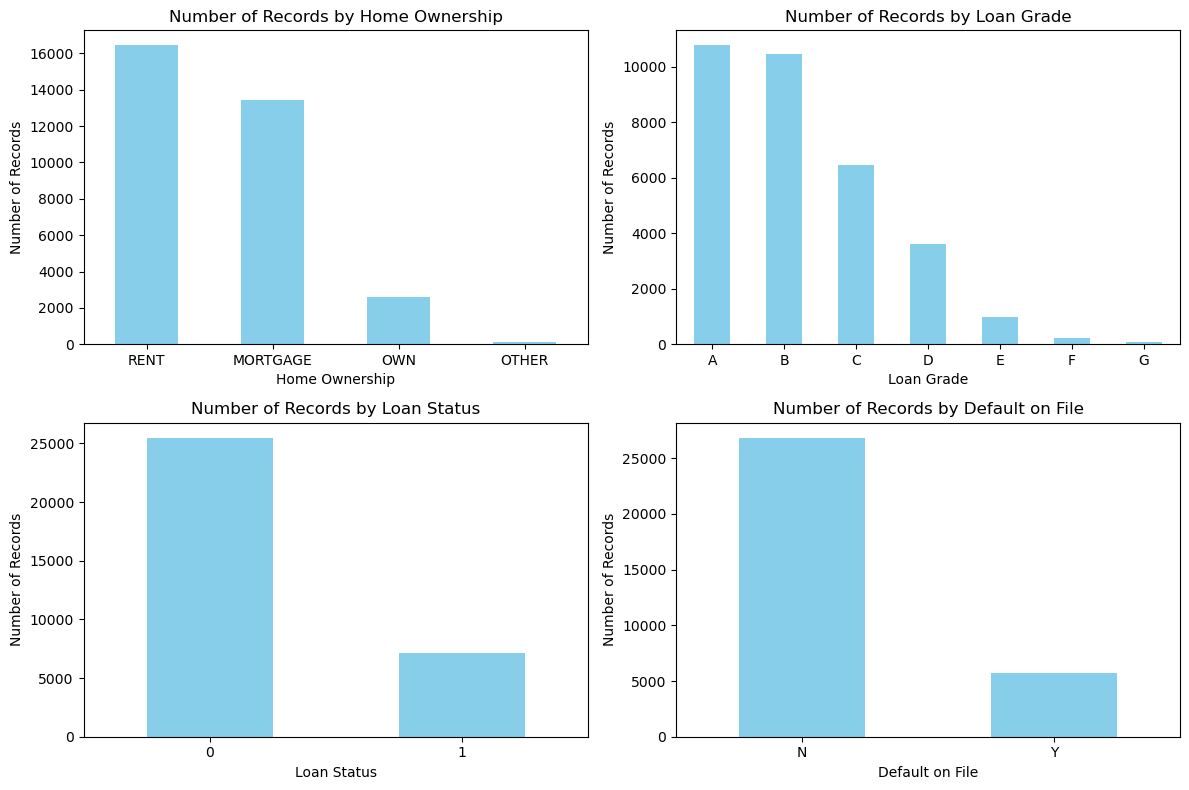

In [10]:
columns = ['person_home_ownership', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
titles = ['Home Ownership', 'Loan Grade', 'Loan Status', 'Default on File']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Number of Records by {titles[i]}')
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Number of Records')
    axes[i].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()

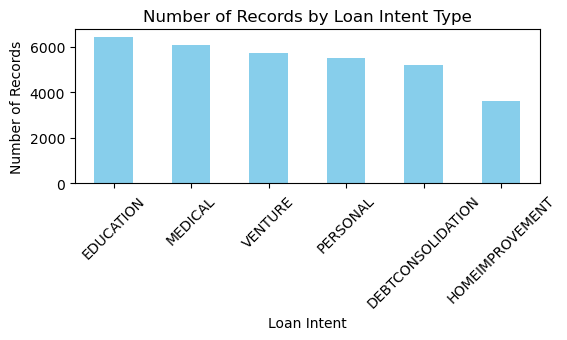

In [11]:
# Unique values in 'loan_intent'
loan_intent_counts = df['loan_intent'].value_counts()
loan_intent_counts.plot(kind='bar', figsize=(6, 2), color='skyblue')

plt.xlabel('Loan Intent')
plt.ylabel('Number of Records')
plt.title('Number of Records by Loan Intent Type')
plt.xticks(rotation=45) 
plt.show()

#### Distributions

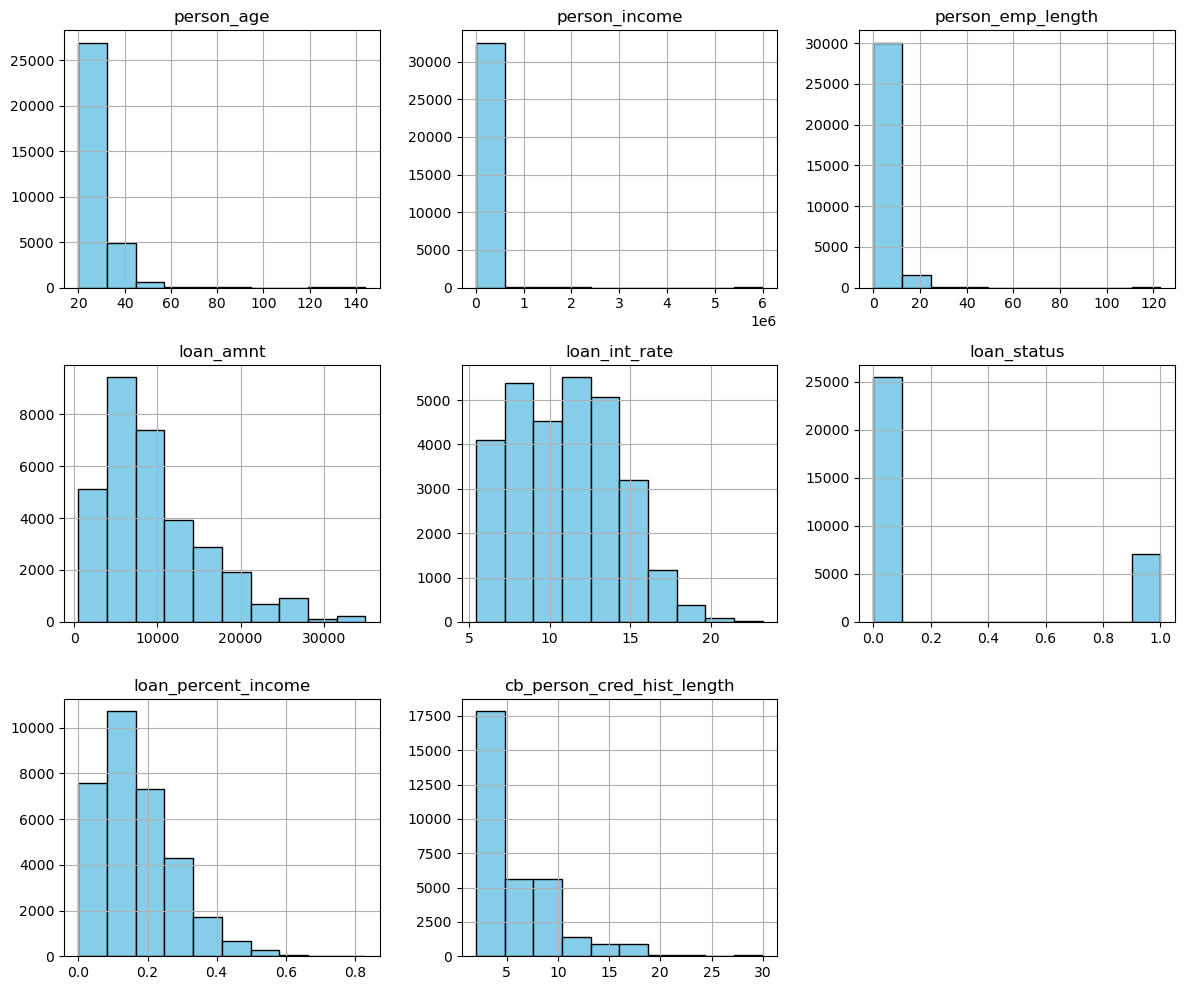

In [12]:
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### Detecting Outliers

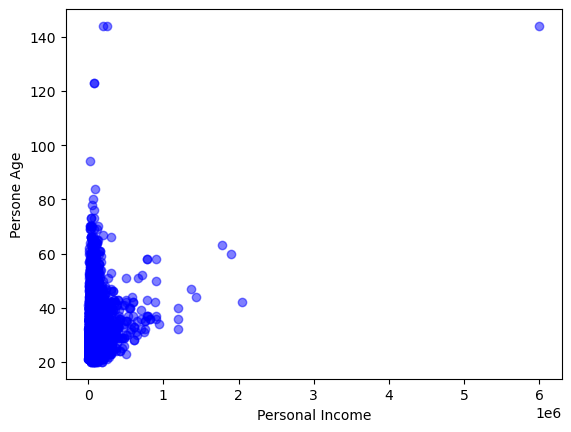

In [13]:
# A scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

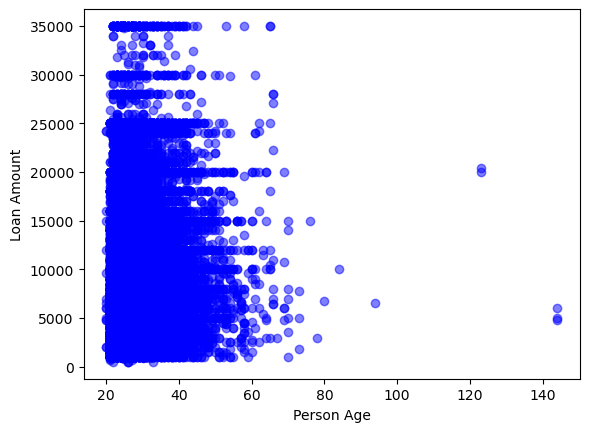

In [14]:
# A scatter plot for age and  loan amount
plt.scatter(df['person_age'], df['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

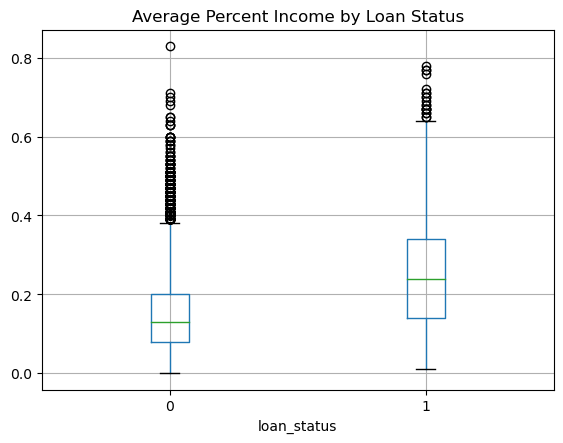

In [15]:
# Create a box plot of percentage income by loan status
df.boxplot(column=['loan_percent_income'], by='loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [16]:
# A cross table of the loan intent and loan status
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [17]:
# A cross table of home ownership, loan status, and grade
print(pd.crosstab(df['person_home_ownership'],[df['loan_status'],df['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [18]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(df['person_home_ownership'], df['loan_status'],
              values=df['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


In [19]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(df['loan_status'],df['person_home_ownership'],
        values=df['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


#### Outliers & Missing Data Handling

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Comments:</strong>
    
*Missing Data*

- person_emp_length: With 895 nulls in this feature, I will handle these by imputing the values with the median of all person_emp_length.

- loan_int_rate: 3116 null values in interest rates are usually set by the institution, having missing data in this column is very strange. This could be an ingestion error. Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult. I will remove the rows with no interest rate.


*Outliers*
    
- It is unlikely that employment length is higher than 60, i will drop these rows
- It is unlikely people over 100 years asked for a loan, I will drop these rows   
    
</div>

In [20]:
# Replace the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)

# Remove null rows from interest rate of nulls
indices = df[df['loan_int_rate'].isnull()].index
df_clean = df.drop(indices)

# Drop records where 'person_emp_length' is greater than 60
indices = df_clean[df_clean['person_emp_length'] > 60].index
df_clean = df_clean.drop(indices)

# Drop records where 'person_age' is greater than 100
df_new = df_clean.drop(df_clean[df_clean['person_age'] > 100].index)

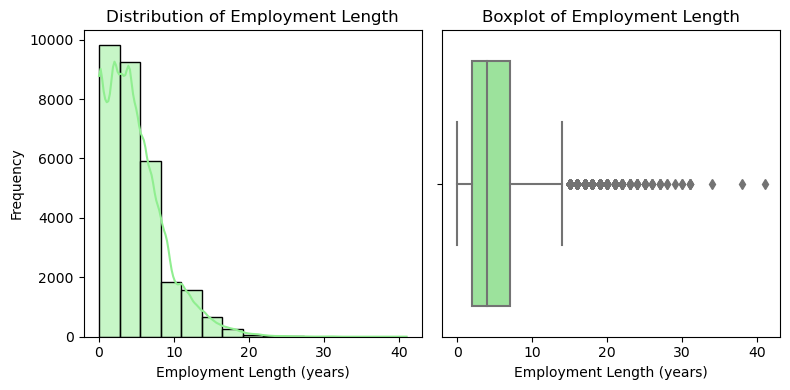

In [21]:
# Set up the figure with subplots for person_emp_length
plt.figure(figsize=(8, 4))

# Histogram for person_emp_length
plt.subplot(1, 2, 1)
sns.histplot(df_new['person_emp_length'].dropna(), bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Frequency')

# Boxplot for person_emp_length
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['person_emp_length'], color='lightgreen')
plt.title('Boxplot of Employment Length')
plt.xlabel('Employment Length (years)')

plt.tight_layout()
plt.show()

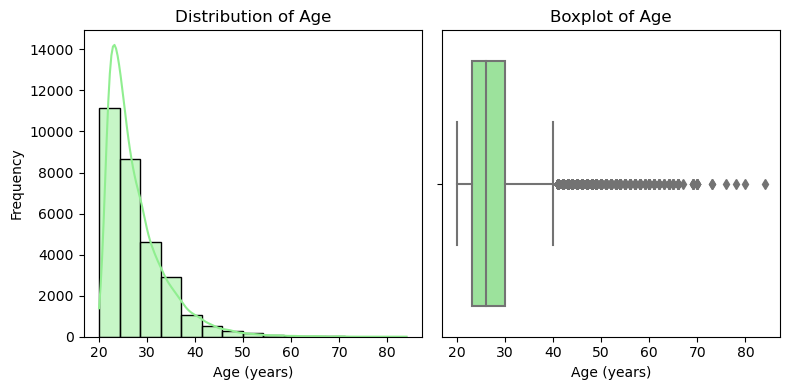

In [22]:
# Set up the figure with subplots for person_age
plt.figure(figsize=(8, 4))

# Histogram for person_age
plt.subplot(1, 2, 1)
sns.histplot(df_new['person_age'].dropna(), bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Boxplot for person_age
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['person_age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age (years)')

# Display the plots
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

#### Distribution Analysis

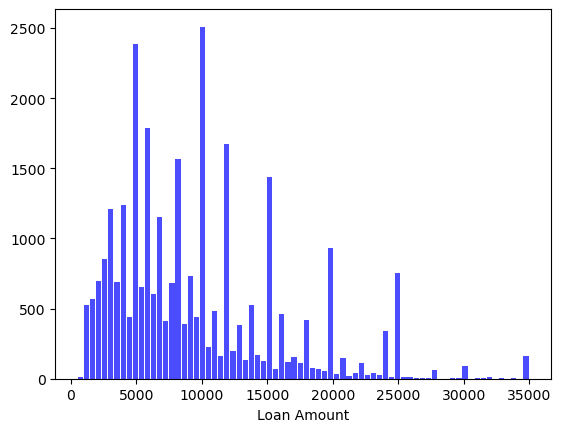

In [23]:
# The distribution of loan amounts
n, bins, patches = plt.hist(x=df_new['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

#### Relationship Analysis

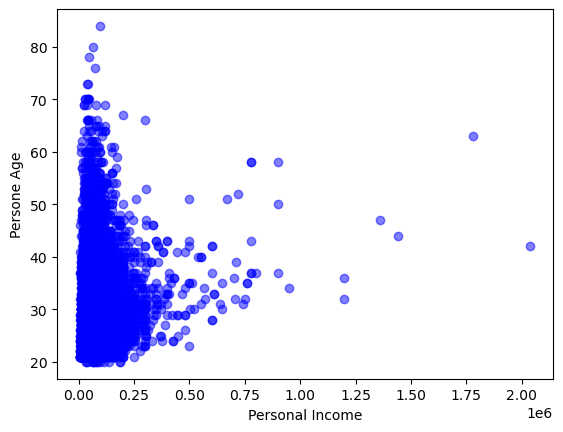

In [24]:
# Plot a scatter plot of income against age
plt.scatter(df_new['person_income'], df_new['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

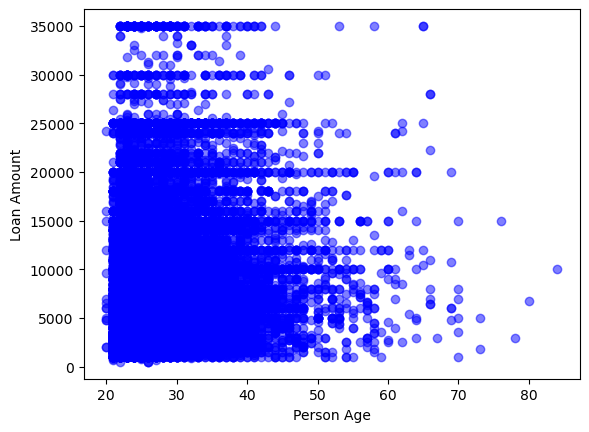

In [25]:
# Create the scatter plot for age and amount
plt.scatter(df_new['person_age'], df_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show() 

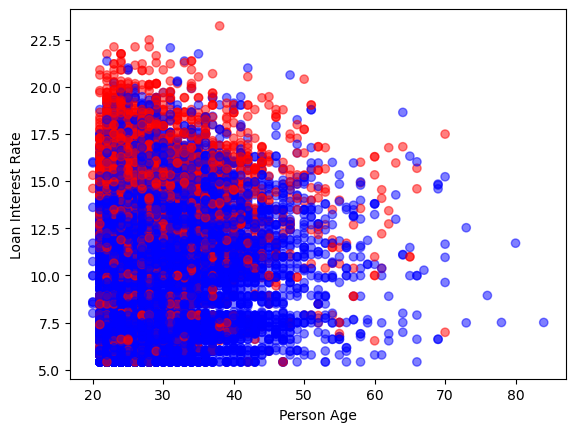

In [26]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(df_new['person_age'], df_new['loan_int_rate'],
            c = df_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Comments</strong>
    
The final scatter plot depicts more defaults with higher interest rates. But how significant are they for predicting? Lets check this. 

We will check the coefficients of each feature to the target to understand there significance. 

We also want to ensure that there is no relationship between the feeatures.   
</div>

### Feature Selection

C:\Users\RaphaelleSmyth\AppData\Local\Temp\ipykernel_12432\3533388017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


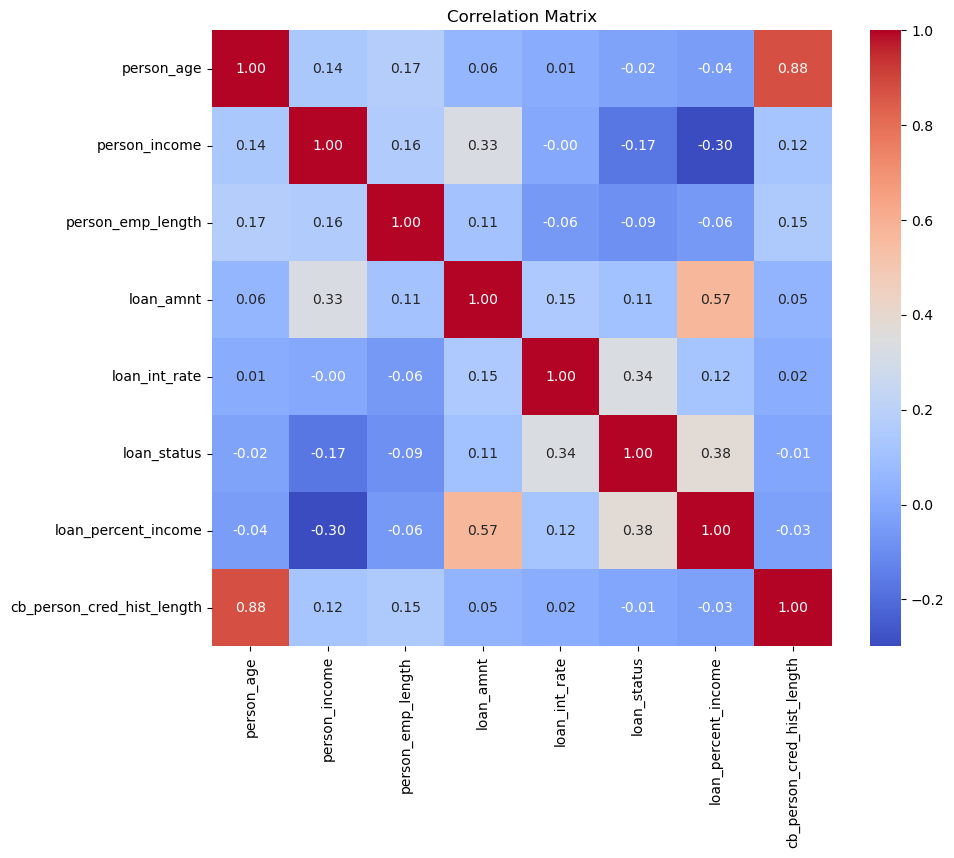

In [27]:
# Assuming df is your DataFrame
correlation_matrix = df_new.corr()

# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

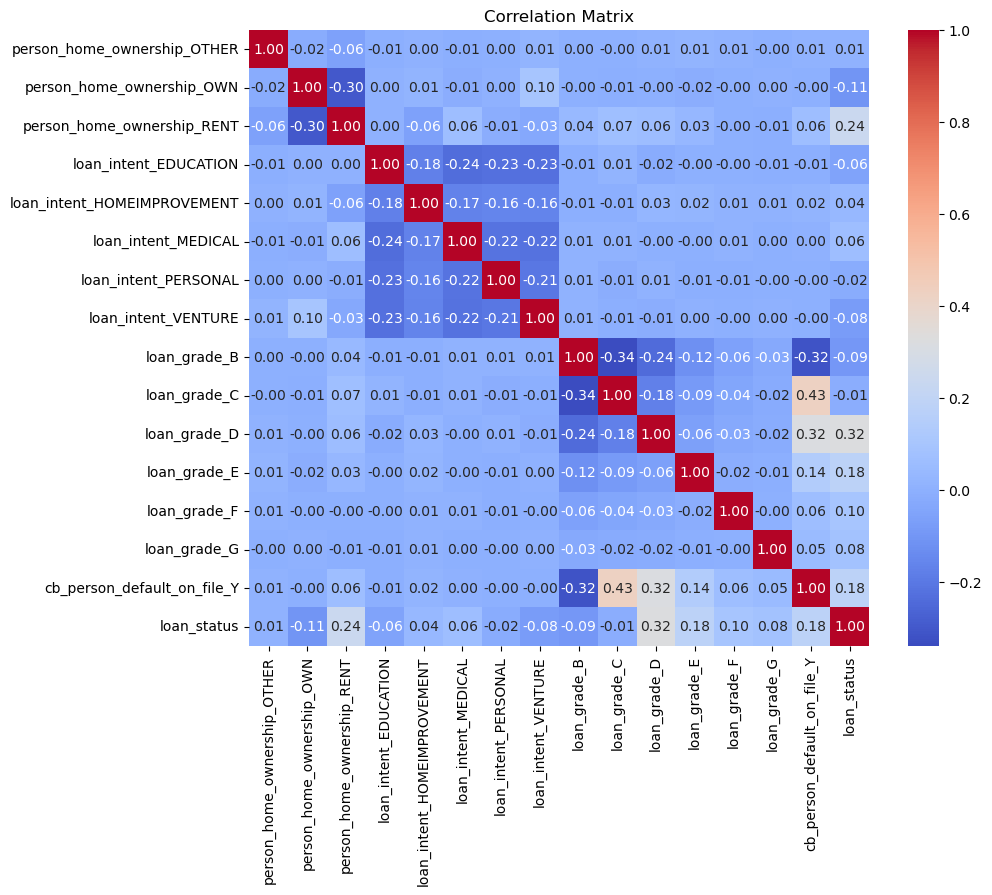

In [28]:
# Perform one-hot encoding on all categorical columns
df_cat = df_new.select_dtypes(include=['object'])
df_encoded = pd.get_dummies(df_cat, drop_first=True)
df_encoded['loan_status'] = df_new['loan_status']

correlation_matrix = df_encoded.corr()

# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Feature Importance - LogisticRegression

In [29]:
# Create the X and y data sets
X = df_new[['loan_int_rate']]
y = df_new[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45784525]


In [30]:
# Create the X and y data sets
X = df_new[['loan_int_rate', 'person_emp_length' ]]
y = df_new[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_multi = LogisticRegression(solver='lbfgs')
clf_logistic_multi.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_multi.intercept_)

[-4.21644963]


In [31]:
# Create the X and y data sets
X = df_new[['loan_int_rate', 'person_emp_length', 'loan_amnt', 'person_income']]
y = df_new[['loan_status']]

# Use train_test_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the model's coefficients
print(clf_logistic.coef_)

[[ 2.76380096e-01 -2.91184156e-02  1.03729844e-04 -3.27624885e-05]]


In [32]:
# Create the X and y data sets
X = df_new[['loan_int_rate','person_emp_length','person_income']]
y = df_new[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 2.88774130e-01 -2.19063447e-02 -1.99385087e-05]]


#### Feature Importance - XGBoost

                       Feature  Importance
5                   loan_grade    0.338545
2        person_home_ownership    0.246743
8          loan_percent_income    0.166121
4                  loan_intent    0.078099
1                person_income    0.049720
3            person_emp_length    0.030818
7                loan_int_rate    0.024828
0                   person_age    0.018433
6                    loan_amnt    0.016670
10  cb_person_cred_hist_length    0.015792
9    cb_person_default_on_file    0.014231


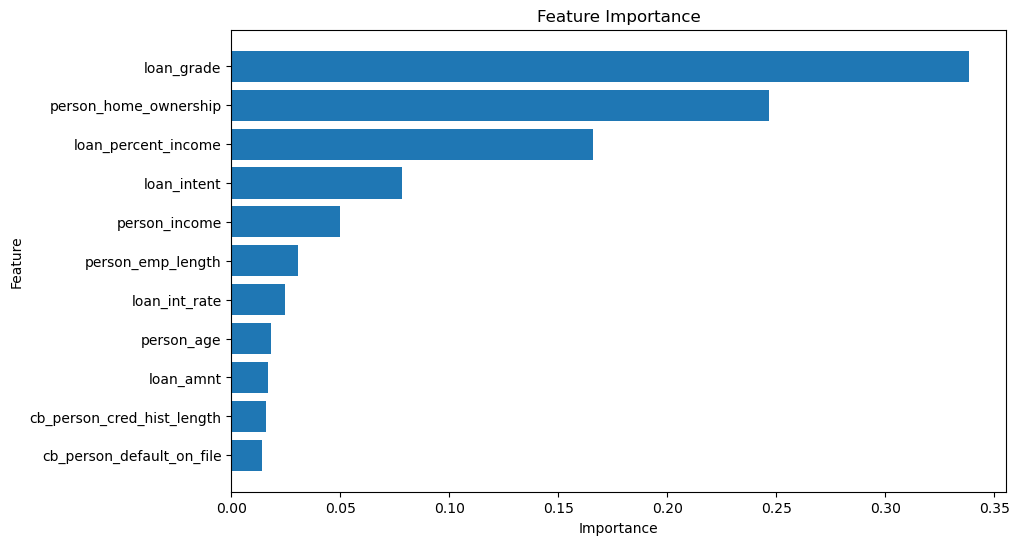

In [131]:
import xgboost as xgb

label_encoders = {}
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_columns:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

# Splitting the data into features and target
X = df_new.drop(columns=['loan_status'])
y = df_new['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Assess feature importance
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to visualize the importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

#### Feature Engineering

One Hot Encoding

In [33]:
df_num = df_new.select_dtypes(exclude=['object'])
df_cat = df_new.select_dtypes(include=['object'])

df_encoded_cat = pd.get_dummies(df_cat, drop_first=True)

df_all = pd.concat([df_num,df_encoded_cat ], axis=1)

In [34]:
df_all

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,0,0,...,0,1,0,1,0,0,0,0,0,0


### Modeling

#### Logistic Regression

In [103]:
# Feature set
X = df_all.drop(columns=['loan_status'])

# Target set
y = df_all['loan_status']

In [104]:
# Train, Test split 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [105]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [107]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9186
           1       0.79      0.56      0.65      2598

    accuracy                           0.87     11784
   macro avg       0.84      0.76      0.79     11784
weighted avg       0.86      0.87      0.86     11784

Confusion Matrix:
[[8788  398]
 [1142 1456]]


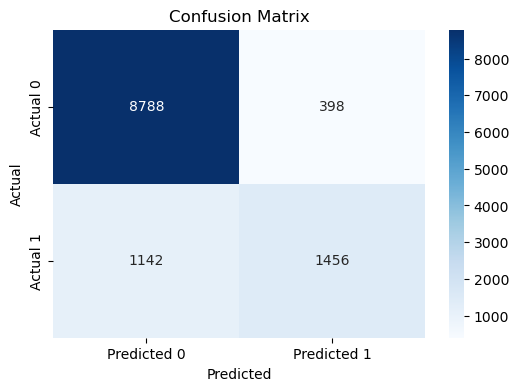

In [108]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

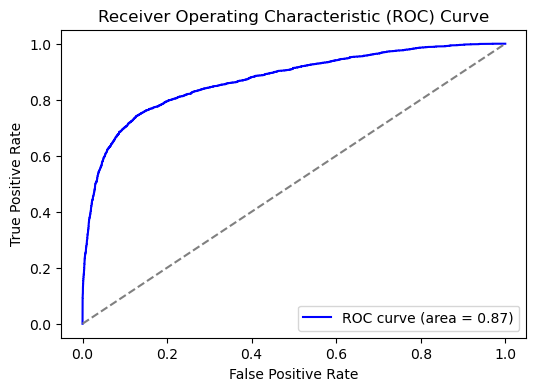

In [109]:
# Generate the probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [110]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(y_prob, columns=['prob_default'])

# Reassign loan status based on the threshold of 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

0    9424
1    2360
Name: loan_status, dtype: int64


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Calculate the average loan amount using the original indices of X_test in df_all
avg_loan_amnt = df_all.loc[X_test.index, 'loan_amnt'].mean()
print("The Average Loan Amount: "+str(avg_loan_amnt))

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]
print("The Number of Defaults Predicted: " +str(num_defaults) )

# Store the default recall from the classification report
# measures the model’s ability to correctly identify actual loan defaults out of all loans that actually defaulted.
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
Estimated_loss = num_defaults * avg_loan_amnt * (1 - default_recall)
print("The Estimated Loss: " +str(Estimated_loss))

The Average Loan Amount: 9509.351663272233
The Number of Defaults Predicted: 2360
The Estimated Loss: 7834856.590557152


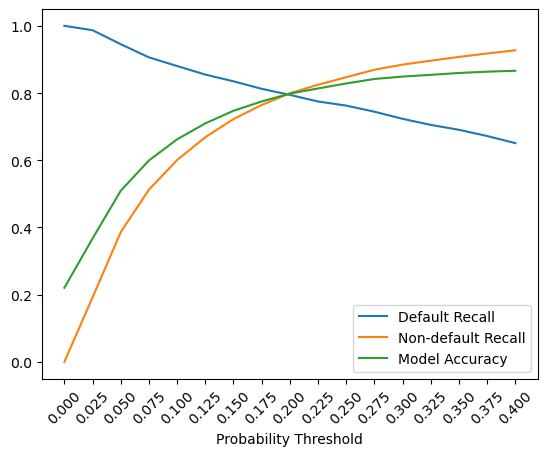

In [119]:
thresholds = np.array([0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4])
default_recall_values = []
non_default_recall_values = []
accuracy_values = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    recall_default = recall_score(y_test, y_pred, pos_label=1)
    recall_non_default = recall_score(y_test, y_pred, pos_label=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    default_recall_values.append(recall_default)
    non_default_recall_values.append(recall_non_default)
    accuracy_values.append(accuracy)

# Now plot as described above
plt.plot(thresholds, default_recall_values)
plt.plot(thresholds, non_default_recall_values)
plt.plot(thresholds, accuracy_values)
plt.xlabel("Probability Threshold")
plt.xticks(thresholds, rotation=45)
plt.legend(["Default Recall", "Non-default Recall", "Model Accuracy"])
plt.show()

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Comments</strong>

Evaluating the trade off between metrics:
- Default Recall: The proportion of actual defaults that were correctly predicted as defaults.
- Non-Default Recall: The proportion of actual non-defaults that were correctly predicted as non-defaults
- Model Accuracy: the overall correctness of the model's predictions. 
    
With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

This threshold could be 0.2, but declaring all loans about 0.2 to be a default is probably not practical. This could lead to a high number of false positives. A probability threshold of 0.2 indicates that there is only a 20% chance that a loan will default. Classifying such loans as defaults could imply that the model is overly cautious or not well-calibrated.
    
Ideally, the threshold should align with the lender's risk tolerance and business strategy, ensuring that the model's predictions are used in a way that balances risk with opportunity.
</div>

#### Decision Trees - XGBoost

XGBoost uses many simplistic trees (esemble)

Output: The probability of default between 0 and 1

In [120]:
# Feature set
X = df_all.drop(columns=['loan_status'])

# Target set
y = df_all['loan_status']

In [121]:
# Train, Test split 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [122]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [124]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9186
           1       0.96      0.73      0.83      2598

    accuracy                           0.93     11784
   macro avg       0.95      0.86      0.90     11784
weighted avg       0.94      0.93      0.93     11784

Confusion Matrix:
[[9108   78]
 [ 689 1909]]


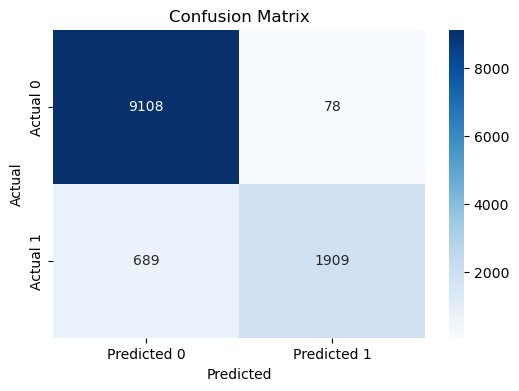

In [125]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

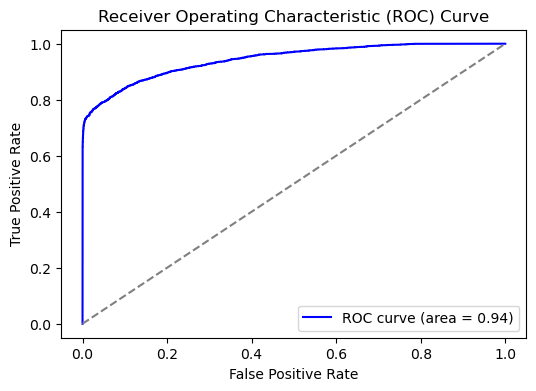

In [126]:
# Generate the probabilities for the positive class using the XGBoost model
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [127]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(y_prob, columns=['prob_default'])

# Reassign loan status based on the threshold of 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.40 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

0    9663
1    2121
Name: loan_status, dtype: int64


In [128]:
# Optionally, you can use predicted probabilities if needed
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Store the predictions in a DataFrame to use for further analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
preds_df = pd.DataFrame({'loan_status': y_pred}, index=X_test.index)

# Calculate the average loan amount using the original indices of X_test in df_all
avg_loan_amnt = df_all.loc[X_test.index, 'loan_amnt'].mean()
print("The Average Loan Amount: " + str(avg_loan_amnt))

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]
print("The Number of Defaults Predicted: " + str(num_defaults))

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
Estimated_loss = num_defaults * avg_loan_amnt * (1 - default_recall)
print("The Estimated Loss: " + str(Estimated_loss))

The Average Loan Amount: 9509.351663272233
The Number of Defaults Predicted: 1987
The Estimated Loss: 5011051.319915785


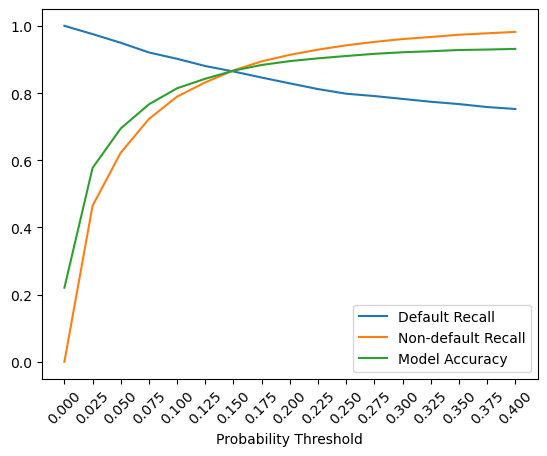

In [130]:
thresholds = np.array([0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4])
default_recall_values = []
non_default_recall_values = []
accuracy_values = []

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    recall_default = recall_score(y_test, y_pred, pos_label=1)
    recall_non_default = recall_score(y_test, y_pred, pos_label=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    default_recall_values.append(recall_default)
    non_default_recall_values.append(recall_non_default)
    accuracy_values.append(accuracy)

# Now plot as described above
plt.plot(thresholds, default_recall_values)
plt.plot(thresholds, non_default_recall_values)
plt.plot(thresholds, accuracy_values)
plt.xlabel("Probability Threshold")
plt.xticks(thresholds, rotation=45)
plt.legend(["Default Recall", "Non-default Recall", "Model Accuracy"])
plt.show()

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Comments</strong>
    
With the graph above displaying the trade of between the default recall, non-default recall and overall accuracy we can see the more desireable results in balancing these metrics are found with a probability threshold of 0.15 for this model. A probability threshold of 0.15 indicates that there is only a 15% chance that a loan will default.

XGBoost overall outperforms the Logistic Regression model with improved recall and accuracy values. 
    
Ideally, the threshold should align with the lender's risk tolerance and business strategy, ensuring that the model's predictions are used in a way that balances risk with opportunity.
    
</div>